In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from datetime import datetime
import pymongo
from pymongo import MongoClient
from wordcloud import WordCloud
import time
import numpy as np

In [31]:
df = pd.read_csv("ks-projects-201801.csv")
df['A'] = pd.to_datetime(df['deadline'])
df['B'] = pd.to_datetime(df['launched'])
df['duration'] = df['A'] - df['B']
df.duration = df.duration.dt.days

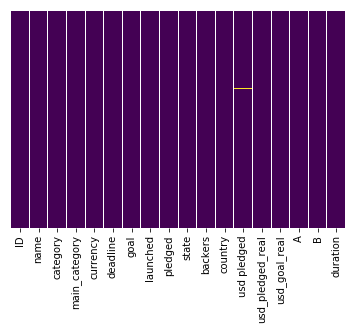

In [32]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
df.drop(columns=['usd_pledged_real','usd_goal_real'],inplace=True)
df_sf =df[(df['state'] == 'successful') | (df['state']=='failed')]
df_sf['main_category'].value_counts().nlargest(5)

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Name: main_category, dtype: int64

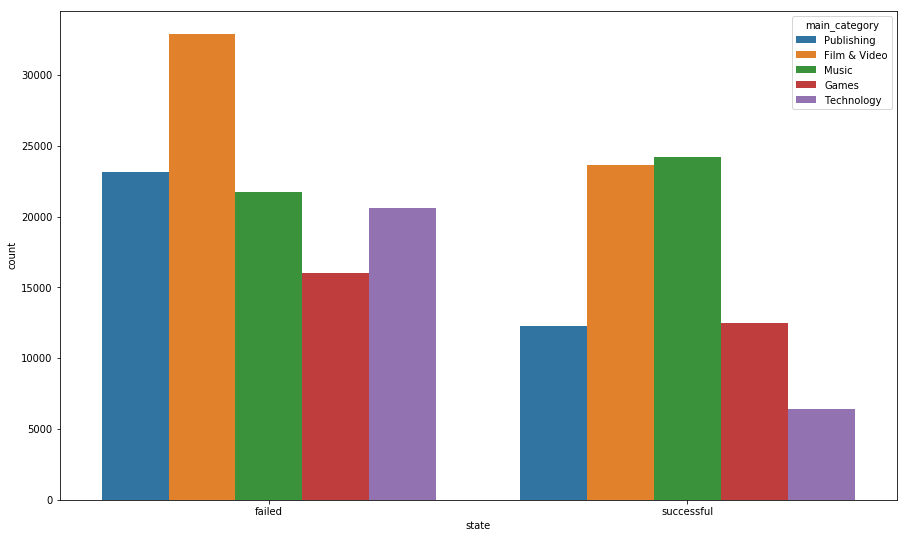

In [34]:
df_sf_t = df_sf[df_sf['main_category'].isin(['Film & Video','Music','Technology','Publishing','Games'])]
plt.figure(figsize=(15,9))
sns.countplot(data=df_sf_t,x='state',hue='main_category')
plt.savefig('Top 5 Categories Success Failed')

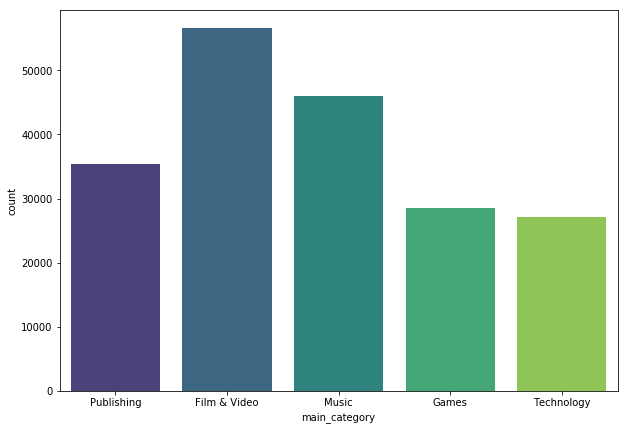

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(x='main_category',data=df_sf_t,palette='viridis')
plt.savefig('selecting_top_5_categories.png')

In [13]:
proj_state = pd.get_dummies(data=df_sf_t['state'], drop_first=True)

In [14]:
df_sf_t = pd.concat([df_sf_t,proj_state],axis=1)

In [15]:
df_sf_t.drop(columns=['ID','name','currency','pledged','A','B','country','deadline','launched'],inplace=True)

In [16]:
df_sf_t.drop(columns=['usd pledged','category','state'],inplace=True)

In [17]:
df_sf_t.columns

Index(['main_category', 'goal', 'backers', 'duration', 'successful'], dtype='object')

In [18]:
cats= {'Publishing':4,'Film & Video':1,
    'Music':2,
    'Games':5,
    'Technology':3}

In [19]:
df_sf_t['main_category'] = df_sf_t['main_category'].replace(cats)

In [21]:
X = df_sf_t.drop('successful',axis=1)
y = df_sf_t['successful']

In [22]:
from sklearn.cross_validation import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [24]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
predictions=log_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.96      0.92     34515
          1       0.92      0.81      0.86     23533

avg / total       0.90      0.90      0.89     58048



In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[32970,  1545],
       [ 4550, 18983]], dtype=int64)

In [29]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(log_model, X,y,scoring="accuracy", cv=5)
avg_accuracy = np.mean(cross_score)
print(cross_score)
labels=[cv]
print("Average accuracy Score: " + str(avg_accuracy))

[0.89428667 0.89361482 0.8938188  0.90586077 0.89454235]
Average accuracy Score: 0.896424683955263
